In [31]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import random as rd
import matplotlib.animation as animation
from matplotlib import style

In [32]:
class Kmeans:
    '''
    dp : datapoints
    K : Choosen K value for number of clusters
    Centroids : Collection of all centroids of clusters
    m : number of observations
    n : number of features
    '''
    def __init__(self,dp,K):
        self.dp=dp
        self.Output={}
        self.Centroids=np.array([]).reshape(self.dp.shape[1],0)
        self.K=K
        self.m=self.dp.shape[0]
        self.n=self.dp.shape[1]
        
        self.initials = np.array([]).reshape(self.dp.shape[1],0)
    
    def k_means(self,n_iter):
        # Initialiasing K centroids randomly from data points
        for i in range(self.K):
            rand=rd.randint(0,self.m-1)
            self.Centroids=np.c_[self.Centroids,self.dp[rand]]
            self.initials = np.c_[self.initials,self.dp[rand]]
        
        '''For each data points compute 
        the euclidian distance from the centroid and assign the cluster based on the minimal distance '''
        for n in range(n_iter):
            EuclidianDistance=np.array([]).reshape(self.m,0)
            for k in range(self.K):
                # calculating eucledian distance
                tempDist=np.sum((self.dp-self.Centroids[:,k])**2,axis=1)
                EuclidianDistance=np.c_[EuclidianDistance,tempDist]
            C=np.argmin(EuclidianDistance,axis=1)+1
           
            
            # adjust the centroids 
            
            # regroup the data points based on the cluster index C and 
            #store in the Output dictionary and also compute the mean of separated clusters and assign it as new centroids
            
            ## Out is temporary dictionary for storing solution for particular iteration
            out={}
            for k in range(self.K):
                out[k+1]=np.array([]).reshape(2,0)
            for i in range(self.m):
                out[C[i]]=np.c_[out[C[i]],self.dp[i]]
        
            for k in range(self.K):
                out[k+1]=out[k+1].T
            for k in range(self.K):
                self.Centroids[:,k]=np.mean(out[k+1],axis=0)
                
            self.Output=out
        
    def predict(self):
        return self.Output,self.Centroids.T
        
    def WCSS(self):
        wcss=0
        for k in range(self.K):
            wcss+=np.sum((self.Output[k+1]-self.Centroids[:,k])**2)
        return wcss



In [33]:
# Load dataset
df=pd.read_csv('faithful.csv')
df.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


In [34]:
data_points = df.iloc[:, [0, 1]].values

In [35]:
m=data_points.shape[0] #number of training examples
n=data_points.shape[1] #number of features. Here n=2
n_iter=100

In [36]:
## Elbow Method to find optimal K value
WCSS_array=np.array([])
for K in range(1,11):
    kmeans=Kmeans(data_points,K)
    kmeans.k_means(n_iter)
    Output,Centroids=kmeans.predict()
    wcss=0
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    #WCSS_array=np.append(WCSS_array,kmeans.WCSS())
    WCSS_array=np.append(WCSS_array,wcss)

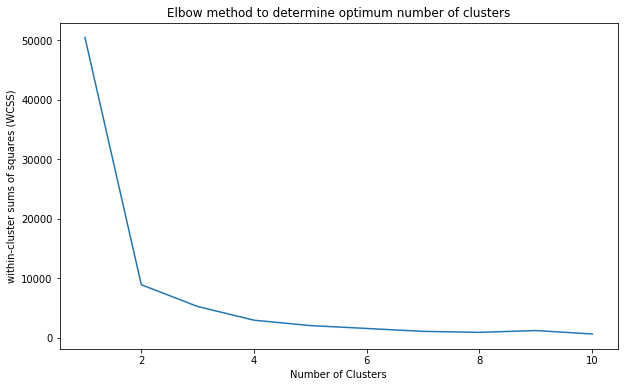

In [37]:
K_array=np.arange(1,11,1)
fig= plt.figure(figsize=(10, 6))
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
fig.savefig("results/elbow.png", bbox_inches="tight")
plt.show()

In [38]:
#based on these observations we choose 5 as optimum number of clusters
K=2

In [39]:
kmeans=Kmeans(data_points,K)
kmeans.k_means(n_iter)
Output,Centroids=kmeans.predict()
intials = kmeans.initials

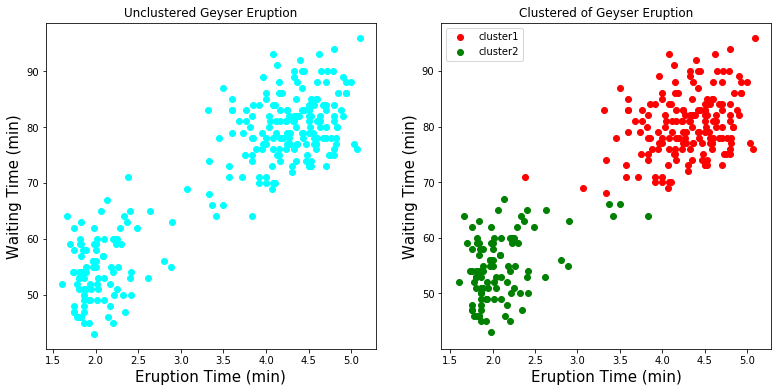

In [40]:
color=['red','green']
labels=['cluster1','cluster2']
fig= plt.figure(figsize=(13, 6))

unclustered = fig.add_subplot(1,2,1)
plt.scatter(df.eruptions, df.waiting, c='cyan')
unclustered.set_xlabel('Eruption Time (min)',fontsize=15)
unclustered.set_ylabel('Waiting Time (min)',fontsize=15)
unclustered.title.set_text('Unclustered Geyser Eruption')

clustered = fig.add_subplot(1,2,2)
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
#plt.scatter(Centroids[:,0],Centroids[:,1],marker='X',s=200,c='blue',label='Centroids')
#plt.scatter(intials.T[:,0],intials.T[:,1],marker='X',s=200,c='yellow',label='Centroid Initialisation')
clustered.set_xlabel('Eruption Time (min)',fontsize=15)
clustered.set_ylabel('Waiting Time (min)',fontsize=15)
clustered.title.set_text('Clustered of Geyser Eruption')
plt.legend()
fig.savefig("results/clustering_1.png", bbox_inches="tight")
plt.show()